Calculation of number of $\nu_\mu$ CC interactions expected in the ATLAS Tile Cal (part of Hcal)

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import nuflux

ModuleNotFoundError: No module named 'nuflux'

Flux given as 

$$\Phi = \frac{dN}{dE d\sigma dA\Omega dt}$$

where $\sigma$ is the $\nu_\mu \rightarrow Fe56$ CC cross-section. so the total differential number of events is 

$$dN = \Phi(E,\theta) d\sigma d\Omega dt dE \times (\text{iron atoms in detector})$$

so 

$$N = \int_E \Phi'(E) \sigma(E) dE \times \text{(500 days)}(4\pi)(4.3e31\text{ Fe atoms in Hcal}) $$

where $\Phi'(E)$ is cos(zenith) averaged flux. Dependence given below

Or, if we wanted to preserve the zenith dependence, 

$$N = \int_E \int_\theta \int_\phi \Phi(E,\theta) \sigma(E) \sin(\theta) dE d\theta d\phi \times \text{(500 days)}(4.3e31\text{ Fe atoms in Hcal}) $$

In [2]:
def get_flux(energy, zenith, nu_type=nuflux.NuMu):
    flux = nuflux.makeFlux('H3a_SIBYLL23C')
    nu_energy=energy # in GeV
    nu_cos_zenith = np.cos(zenith)
    return flux.getFlux(nu_type,nu_energy,nu_cos_zenith)

def get_flux_cosZenithAvged(energy):
    zenith_range = np.arange(0,np.pi,0.01)
    return np.mean(get_flux(energy,zenith_range))

In [3]:
cross_section_spectrum_array = np.loadtxt("nu_cross_sections/nu_mu_Fe56_cc_tot.txt", dtype=float)
cross_section_spectrum_array_anti = np.loadtxt("nu_cross_sections/nu_mu_bar_Fe56_cc_tot.txt", dtype=float)
def get_cs(energy):
    return np.interp(energy, cross_section_spectrum_array[:,0], cross_section_spectrum_array[:,1]*1e-38)
def get_cs_bar(energy):
    return np.interp(energy, cross_section_spectrum_array_anti[:,0], cross_section_spectrum_array_anti[:,1]*1e-38)

In [4]:
# set fixed parameters
m_Hcal = 4e6 # assume iron??!?!?
m_nucleon = 1.67e-27
n_nucleons_in_Hcal = m_Hcal / m_nucleon
n_Fe56_in_Hcal = m_Hcal / (56*m_nucleon)

time = 500 * 86400 #500 days, in seconds

Flux with zenith dependence

In [5]:
def dN(zenith, energy): 
    dN = get_cs(energy) * get_flux(energy, zenith) * np.sin(zenith)
    return dN

def dN_bar(zenith, energy):
    dN_bar = get_cs_bar(energy) * get_flux(energy, zenith, nu_type=nuflux.NuMuBar) * np.sin(zenith)
    return dN_bar

N_pred_tot = sp.integrate.dblquad(dN, 1.5, 120, 0, np.pi)[0] * 2*np.pi * time * n_Fe56_in_Hcal
N_pred_tot = N_pred_tot + sp.integrate.dblquad(dN_bar, 1.5, 120, 0, np.pi)[0] * 2*np.pi * time * n_Fe56_in_Hcal
N_pred_tot

149.42664575869185

(Kopp paper predicts around 160 events)

### random plots

Text(0.5, 1.0, '$\\nu_\\mu \\rightarrow Fe56$ total CC cross section')

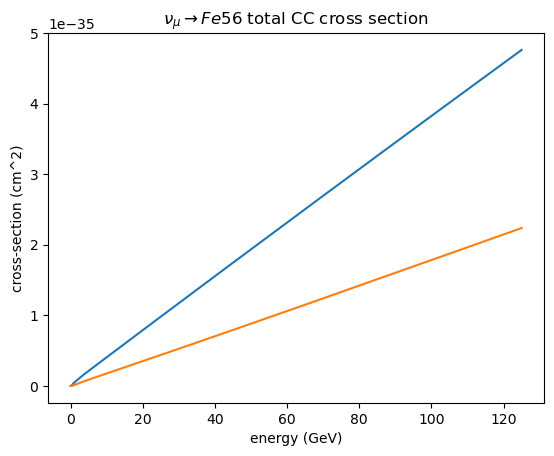

In [6]:
#sanity check: plot of total CC cross section for mu_nu -> Fe56 
plt.plot(cross_section_spectrum_array[:,0], cross_section_spectrum_array[:,1]*1e-38)
plt.plot(cross_section_spectrum_array_anti[:,0], cross_section_spectrum_array_anti[:,1]*1e-38)
plt.xlabel('energy (GeV)')
plt.ylabel('cross-section (cm^2)')
plt.title(r'$\nu_\mu \rightarrow Fe56$ total CC cross section')

Text(0, 0.5, 'flux @ cosZenith=1')

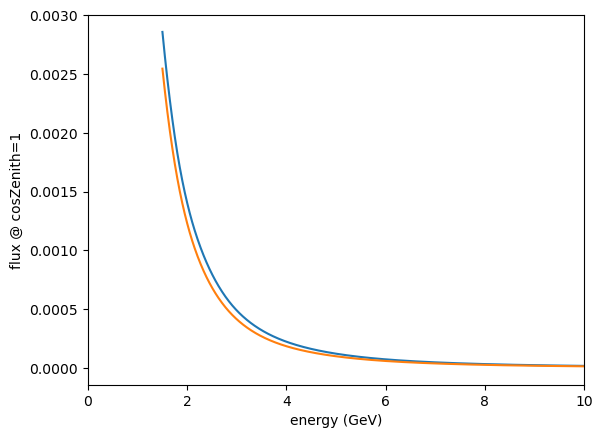

In [7]:
#sanity check: plot of flux from nuflux as a fcn of energy: 
plt.plot(np.arange(1.5,120,0.01), get_flux(np.arange(1.5,120,0.01),0))
plt.plot(np.arange(1.5,120,0.01), get_flux(np.arange(1.5,120,0.01),0,nu_type=nuflux.NuMuBar))
plt.xlim(0,10)
plt.xlabel('energy (GeV)')
plt.ylabel('flux @ cosZenith=1')

Text(0, 0.5, 'flux @ energy=2 GeV')

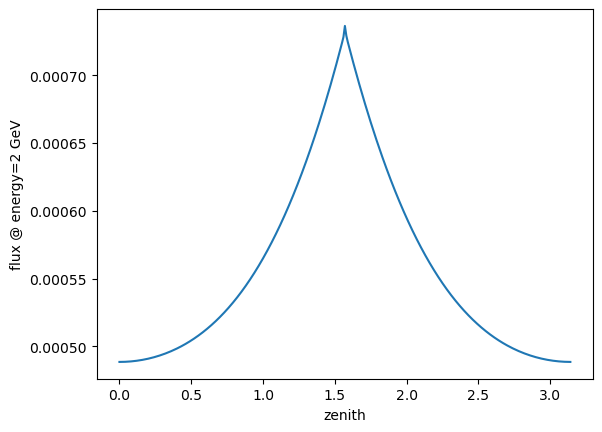

In [8]:
#sanity check: plot of flux from nuflux as a fcn of zenith: 
plt.plot(np.arange(0,np.pi,0.01), get_flux(3,np.arange(0,np.pi,0.01)))
plt.xlabel('zenith')
plt.ylabel('flux @ energy=2 GeV')